In [2]:
import pandas as pd
import os
import numpy as np
import pprint
import pickle
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from pathlib import Path
from collections import deque

In [3]:
data = pd.read_csv("SOM3N4SID_clean3.csv") # dataset from January to January 12 months
df=pd.DataFrame(data)
df.mean()
df=df.fillna(df.mean())

In [4]:
for i in df.columns:
    print(i)

Time
Core_T
Core_QconFlow
P1_DamSet
P1_DamPos
P1_CooPow
P1_CooSet
P1_HeaSet
P1_HeaPow
P1_FanPow
P1_RH
P1_FanSet
Core_DamSet
Core_DamPos
Core_CooPow
Core_CooSet
Core_HeaPow
Core_HeaSet
Core_FanPow
Core_RH
Core_FanSet
P2_DamSet
P2_DamPos
P2_CooSet
P2_CooPow
P2_HeaPow
P2_HeaSet
P2_FanPow
P2_RH
P2_FanSet
P3_DamSet
P3_DamPos
P3_CooPow
P3_CooSet
P3_HeaSet
P3_HeaPow
P3_FanPow
P3_RH
P3_FanSet
P4_DamSet
P4_DamPos
P4_CooSet
P4_CooPow
P4_HeaPow
P4_HeaSet
P4_FanPow
P4_RH
P4_FanPow.1
P1_T
P1_QconFlow
P2_T
P2_QconFlow
P3_T
P3_QconFlow
P4_T
P4_QconFlow
T_OA
T_OAWB
HgloHor1
OA_RH
day
hour
Core_FanVol
Core_OAVol
P1_FanVol
P1_OAVol
P2_FanVol
P2_OAVol
P3_FanVol
P3_OAVol
P4_FanVol
P4_OAVol
CORE_IntGaiTot
P1_IntGaiTot
P2_IntGaiTot
P3_IntGaiTot
P4_IntGaiTot
Core_OccN
Core_OccGain
P1_OccN
P1_OccGai
P2_OccN
P2_OccGai
P3_OccN
P3_OccGai
P4_OccN
P4_OccGai
Core_LigGai
P1_LigGai
P2_LigGai
P2_LigGai.1
P4_LigGai
Core_ElecGai
P1_ElecGai
P2_ElecGai
P3_ElecGai
P4_ElecGai
Core_T_prev
P1_T_prev
P2_T_prev
P3_T_prev
P4_T_p

A: (5, 5) [[-4.73961024e-02  3.11109531e-01  1.00569037e-01 -3.44413780e-03
   1.23284985e-02]
 [ 3.27900046e+00  2.54030116e-01  5.14329289e-01 -1.91229387e-02
   5.64002029e-02]
 [ 7.41932926e-01 -6.20273360e-01 -5.15616979e-01  1.20463745e-01
  -1.01207150e-01]
 [-3.20229055e+00  6.02664135e-01 -9.90380002e-01  9.25947216e-01
   1.15231172e-01]
 [-9.24480400e+00  1.78392258e+00 -2.62629049e+00 -4.57089722e-01
   1.54322021e-01]]
B: (5, 7) [[-7.29177688e-03 -6.17359175e-02 -7.38025550e-05  2.75739456e-08
  -2.63571960e-07  1.28377063e-06  4.94353539e-04]
 [ 2.30393538e-02  1.49069300e-02  1.05047255e-04 -8.79659907e-08
  -3.33243717e-07 -1.21315538e-06 -8.46400645e-04]
 [ 4.80163261e-03  3.56211673e-01  1.57251509e-04  6.29570244e-07
   2.73712086e-06 -1.90549760e-05  3.79763448e-03]
 [-2.26409109e-02  8.79072064e-02 -2.42237895e-03  1.11913513e-05
  -5.98632569e-06 -1.09066112e-05 -1.47973973e-02]
 [-6.53046737e-02  2.03700959e-01 -3.00161885e-04 -5.85459135e-06
  -1.89078493e-05  1

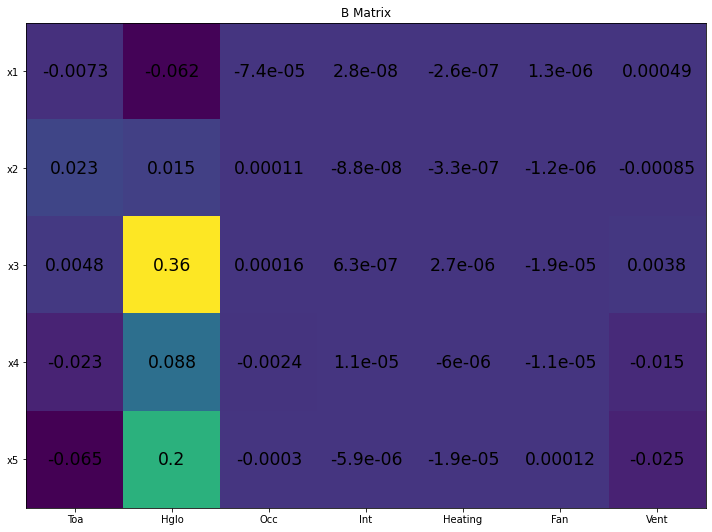

In [5]:
# Version 5

p = Path('.').resolve()

if p.exists():
    a_matrix = np.load(p / 'output' / 'matrix_A1.npy')
    b_matrix = np.load(p / 'output' / 'matrix_B1.npy')
    c_matrix = np.load(p / 'output' / 'matrix_C1.npy')
    d_matrix = np.load(p / 'output' / 'matrix_D1.npy')
    x0 = np.load(p / 'output' / 'sys_id1_x0.npy')
    u1test = np.load(p / 'output' / 'u1test.npy')
    
print(f"A: {a_matrix.shape} {a_matrix}")
print(f"B: {b_matrix.shape} {b_matrix}")
print(f"C: {c_matrix.shape} {c_matrix}")
print(f"D: {d_matrix.shape} {d_matrix}")
# print(f"x0: {x0}")
# print(u1test)

labels_x_states = [f"x{x+1}" for x in range(0,x0.shape[0])] 
labels_vars = ['Toa', 'Hglo', 'Occ', 'Int', 'Heating', 'Fan', 'Vent']

# Plot the b_matrix to see the sensitivities of th e input variables
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(b_matrix)


ax.set_xticks(np.arange(len(labels_vars)))
ax.set_yticks(np.arange(len(labels_x_states)))
# # ... and label them with the respective list entries
ax.set_xticklabels(labels_vars)
ax.set_yticklabels(labels_x_states)

# Loop over data dimensions and create text annotations.
for i in range(len(labels_x_states)):
    for j in range(len(labels_vars)):
        text = ax.text(j, i, f"{b_matrix[i, j]:,.2}",
                       ha="center", va="center", color="black", size='xx-large')

ax.set_title("B Matrix")
fig.tight_layout()
plt.show()


In [12]:
# verify that we can create the same response as seen in
# the testing results
_x = x0
print(_x)
temperatures = {}

print(u1test[0])
for case in range(0, 1):
    temperatures[case] = []
    for t in range(0, 120):
        if case == 0:
            _u = np.array([
                [u1test[0][t]], # T_OA (K)  - freezing outside
                [u1test[1][t]],  # Horizontal Global Irradiance (W) 
                [u1test[2][t]],  # No occupants [ 0 - 6]
                [u1test[3][t]],  # Internal gains convective flow (W), ?  [ 0 - 3000]
                [u1test[4][t]], # Heating Power (W), [0 - 6000]
                [u1test[5][t]],  # Fan Power (W), ? [0 - 500]
                [u1test[6][t]],    # OA Volumetric flow rate (m3/s), [0.01 - 0.175]  # full outside ai
            ])
        elif case == 1:
            _u = np.array([
                [u1test[0][t]], # T_OA (K)  - freezing outside
                [u1test[1][t]],  # Horizontal Global Irradiance (W) 
                [u1test[2][t]],  # No occupants [ 0 - 6]
                [u1test[3][t]],  # Internal gains convective flow (W), ?  [ 0 - 3000]
                [6000], # Heating Power (W), [0 - 6000]
                [u1test[5][t]],  # Fan Power (W), ? [0 - 500]
                [u1test[6][t]],    # OA Volumetric flow rate (m3/s), [0.01 - 0.175]  # full outside ai
            ])
        elif case == 2:
            _u = np.array([
                [u1test[0][t]], # T_OA (K)  - freezing outside
                [u1test[1][t]],  # Horizontal Global Irradiance (W) 
                [u1test[2][t]],  # No occupants [ 0 - 6]
                [u1test[3][t]],  # Internal gains convective flow (W), ?  [ 0 - 3000]
                [0], # Heating Power (W), [0 - 6000]
                [u1test[5][t]],  # Fan Power (W), ? [0 - 500]
                [u1test[6][t]],    # OA Volumetric flow rate (m3/s), [0.01 - 0.175]  # full outside ai
            ])
            
        #     print(_u)
        #     print(f"{t}: T_OA: {_u[0]}")
        #     print(f"{t}: HGlo: {_u[1]}")
        #     print(f"{t}: Occu: {_u[2]}")
        #     print(f"{t}: IntG: {_u[3]}")
        #     print(f"{t}: HeaP: {_u[4]}")
        #     print(f"{t}: FanP: {_u[5]}")
        #     print(f"{t}: OAVo: {_u[6]}")

        #     print(f"U: {_u.shape}")
        #     print(f"A: {a_matrix.shape} {a_matrix}")
        #     print(f"B: {b_matrix.shape} {b_matrix}")
        #     print(f"C: {c_matrix.shape} {c_matrix}")
        #     print(f"D: {d_matrix.shape} {d_matrix}")
        #     print(f"x0: {_x}")

        x_next = a_matrix @ _x   + b_matrix @ _u
        #     x_next = np.dot(a_matrix, _x)  + np.dot(b_matrix, _u)
        #     print(x_next)
        #     print(len(x_next))
        
        print(f"x_next with _u=0 {a_matrix @ _x}")
        print(x_next)
        break
        t_indoor = c_matrix @ _x + d_matrix @ _u
        _x = x_next

            # print(f"x_next: {x_next.shape} {x_next}")
        temperatures[case].append(t_indoor[0][0]-273.15)
#         print(f"{t}: Indoor temperature is {t_indoor[0][0]-273.15}")
# print(temperaturses)

[[-1.92146875]
 [-0.17772532]
 [-0.0190719 ]
 [-0.01875407]
 [-0.00991083]]
[268.15 268.15 268.15 ... 256.45 256.45 256.45]
x_next with _u=0 [[ 0.03380245]
 [-6.35565406]
 [-1.30678499]
 [ 6.04637364]
 [17.50368492]]
[[-1.92146275]
 [-0.17770875]
 [-0.0190238 ]
 [-0.01872099]
 [-0.01009129]]


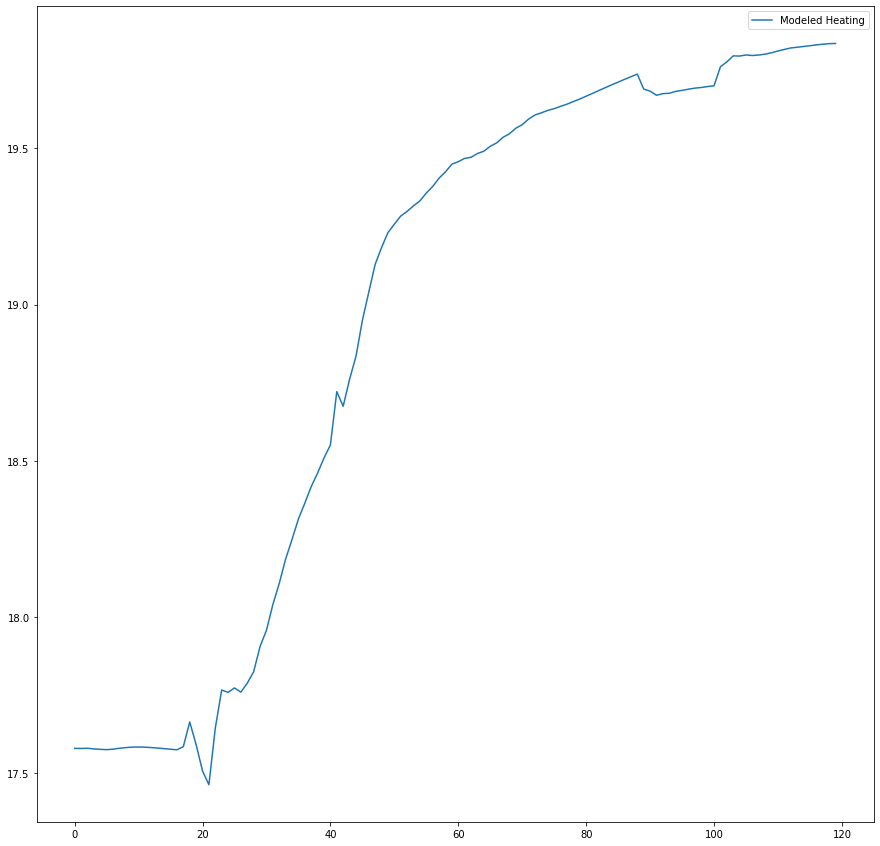

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(temperatures[0], label='Modeled Heating')
# plt.plot(temperatures[1], label='Max Heating')
# plt.plot(temperatures[2], label='No Heating')
plt.legend()



# fig, ax = plt.subplots(figsize=(15, 2))
# plt.plot(results['mpc']['_x', 't_indoor'][:max_t], 'g--', label="Tin[t]")
# plt.plot(results['mpc']['_x', 't_indoor_1'][:max_t], 'b--', label="Tin[t-1]")




In [41]:
df = pd.DataFrame(u1test.T, columns=labels_vars)
display(df)

array([[2.68150000e+02, 2.68150000e+02, 2.68150000e+02, ...,
        2.56450000e+02, 2.56450000e+02, 2.56450000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.47906136e-03, 7.63373562e-03, 1.14135864e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.10602799e-01, 6.10602799e-01, 6.10602799e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.43478760e+03, 3.43458030e+03, 3.29728600e+03],
       [7.48106860e+00, 7.48106860e+00, 7.48106860e+00, ...,
        3.80452450e+02, 3.80452580e+02, 3.80452640e+02],
       [3.09232820e-05, 3.09232820e-05, 3.09232820e-05, ...,
        4.18597920e-04, 4.18521500e-04, 4.18486420e-04]])

array([[2.68150000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.48106860e+00, 3.09232820e-05],
       [2.68150000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.48106860e+00, 3.09232820e-05],
       [2.68150000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.48106860e+00, 3.09232820e-05],
       ...,
       [2.56450000e+02, 4.47906136e-03, 6.10602799e-01, ...,
        3.43478760e+03, 3.80452450e+02, 4.18597920e-04],
       [2.56450000e+02, 7.63373562e-03, 6.10602799e-01, ...,
        3.43458030e+03, 3.80452580e+02, 4.18521500e-04],
       [2.56450000e+02, 1.14135864e-02, 6.10602799e-01, ...,
        3.29728600e+03, 3.80452640e+02, 4.18486420e-04]])

,Toa,Hglo,Occ,Int,Heating,Fan,Vent
0,268.15,0.000000,0.000000,549.324900,0.0000,7.481069,0.000031
1,268.15,0.000000,0.000000,549.324900,0.0000,7.481069,0.000031
2,268.15,0.000000,0.000000,549.324900,0.0000,7.481069,0.000031
3,268.15,0.000000,0.000000,549.324900,0.0000,7.481069,0.000031
4,268.15,0.000000,0.000000,610.361000,0.0000,7.481069,0.000031
5,268.15,0.000000,0.000000,610.361000,0.0000,7.481069,0.000031
6,268.15,0.000000,0.000000,610.361000,0.0000,7.481069,0.000031
7,268.15,0.000000,0.000000,610.361000,0.0000,7.481069,0.000031
8,268.15,0.000000,0.000000,610.361000,0.0000,7.481069,0.000031
9,268.15,0.000000,0.000000,610.361000,0.0000,7.481069,0.000031


In [ ]:



# Test with random data
_x = np.array((
            [2.46448],[-2.80786],[0.435631],[0.754336],[-3.03051],[-3.59742],[10.7656]
            ))
_u = np.array([273, # T_OA (K)  - freezing outside
               0,  # Horizontal Global Irradiance (W) 
               0,  # No occupants [ 0 - 6]
               1000,  # Internal gains convective flow (W), ?  [ 0 - 3000]
               13000, # Heating Power (W), [0 - 6000]
               500,  # Fan Power (W), ? [0 - 500]
               0.175,    # OA Volumetric flow rate (m3/s), [0.01 - 0.175]  # full outside ai
              ])

print(f"x_next is {x_next}")
print(f"y_modeled is {y_modeled[0][0]}")


labels_y = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'] 
labels = ['Toa', 'Hglo', 'Occ', 'Int', 'Heating', 'Fan', 'Vent']
print(a_matrix.shape)
print(b_matrix.shape)
print(c_matrix.shape)
print(d_matrix.shape)
print('here')
print(b_matrix @ _u)
x_next = a_matrix @ _x + b_matrix @ _u
y_modeled = c_matrix @ _x + d_matrix @ _u